In [ ]:
import sys
import numpy as np
sys.path.append(".../RADAR")
from RADAR.visualization_module import DataVisualization


#### Generate synthetic data

In [ ]:
np.random.seed(42)
data = np.random.rand(100,5)   


vis = DataVisualization(data, plot_technique='heatmap', heatmap_color='viridis')
vis.fit()  
vis.show()  


In [ ]:
from sklearn.datasets import make_blobs

# Generate sample data
data1, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Visualization with PCA and scatter plot
vis = DataVisualization(data1, plot_technique='scatter', dim_reduction_technique='PCA', 
                        color_map=labels, point_size=10, opacity=0.7)
vis.fit()
vis.show()

In [ ]:
#Testing without dimensionality reduction

# Histogram
vis_hist = DataVisualization(data, plot_technique='hist')
vis_hist.fit()
vis_hist.show()

# Boxplot 
vis_box = DataVisualization(data, plot_technique='boxplot')
vis_box.fit()
vis_box.show()

# Heatmap 
vis_heatmap = DataVisualization(data, plot_technique='heatmap')
vis_heatmap.fit()
vis_heatmap.show()

In [ ]:
#Testing with dimensionality reduction

# t-SNE
vis_tsne = DataVisualization(data, plot_technique='scatter', dim_reduction_technique='t-SNE', n_components=2)
vis_tsne.fit()
vis_tsne.show()

# UMAP
vis_umap = DataVisualization(data, plot_technique='scatter', dim_reduction_technique='UMAP', n_components=2)
vis_umap.fit()
vis_umap.show()

### Test with model AutoEncoder flexanomalies

In [ ]:
from RADAR.visualization_module import DataVisualization
from RADAR.static_data.static_datasets_uci import global_load
from sklearn.model_selection import train_test_split

#from flexanomalies.utils.load_data import load_and_split_dot_mat
# X_train, X_test, y_train, y_test = load_and_split_dot_mat(
#     "/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/datasets/data/shuttle.mat", 0.3
# )

X,y = global_load('default_of_credit_card_clients')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
from RADAR.federated_data.algorithms import flexanomalies

kwargs = {
    "algorithm_": "autoencoder",
    "contamination":0.1,
    "label_parser": None,
     "epochs": 100,
     "input_dim": X_train.shape[1],
     "batch_size": 8,
     "neurons": [16,8, 16],
     "hidden_act": ['relu', 'relu', 'relu'],
     "n_clients":2,
     "n_rounds":10,
     }

modelAE = flexanomalies.FlexAnomalyDetection(**kwargs)
print(modelAE.get_params())

In [ ]:
from RADAR.static_data.preprocessing.preprocessing_static import StandardScalerPreprocessing 
scaler = StandardScalerPreprocessing()
X_scaled = scaler.fit_transform(X_train)
vis = DataVisualization(X_scaled, plot_technique='scatter', dim_reduction_technique='PCA', n_components=2)
vis.fit()
vis.show()

In [ ]:
modelAE.fit(X_train,y_train)

In [ ]:
modelAE.predict(X_test)
modelAE.model.labels_

modelAE.evaluate(X_test,y_test)
print(modelAE.model.d_scores_)  


In [7]:
true =np.array(y_test).flatten()
pred = np.array(modelAE.model.labels_).astype(int)


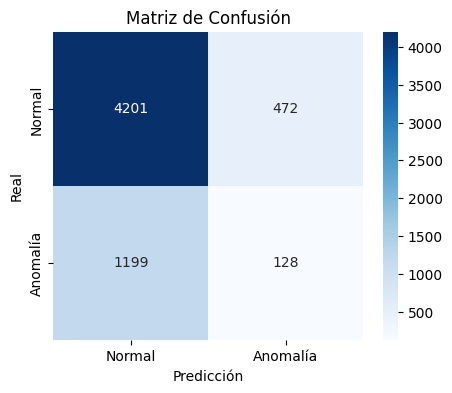

In [8]:
# Confusion Matrix 
from RADAR.metrics_module import plot_confusion_matrix
plot_confusion_matrix(true,pred)

In [9]:
# Plot Anomaly Labels 
visualizer = DataVisualization(data=None, plot_technique='anomaly_labels', y_true=true[40:60], y_pred=pred[40:60])
visualizer.show()

In [11]:

visualizer = DataVisualization(data=X_test, plot_technique='plot_anomaly', dim_reduction_technique='PCA', y_true=true, y_pred=pred,subset_size_percent=0.2)
visualizer.fit()
visualizer.show()